# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.403400e+01     1.477141e+01
 * time: 0.004077911376953125
     1     6.205407e+01     1.054006e+01
 * time: 0.013104915618896484
     2     5.624317e+01     1.526613e+01
 * time: 0.03192496299743652
     3     4.061948e+01     1.089969e+01
 * time: 0.1588129997253418
     4     3.120535e+01     9.749554e+00
 * time: 0.18500494956970215
     5     2.794264e+01     8.361661e+00
 * time: 0.21361184120178223
     6     1.346786e+01     3.275926e+00
 * time: 0.23892498016357422
     7     9.361933e+00     2.975555e+00
 * time: 0.2579970359802246
     8     8.416376e+00     2.876748e+00
 * time: 0.2767610549926758
     9     7.849512e+00     1.575497e+00
 * time: 0.29528188705444336
    10     7.422282e+00     2.195592e+00
 * time: 0.3111898899078369
    11     7.063260e+00     1.699384e+00
 * time: 0.38804006576538086
    12     6.713782e+00     1.483254e+00
 * time: 0.40331506729125977
    13     6.531764e+00     1.445784e+00
 * time: 0

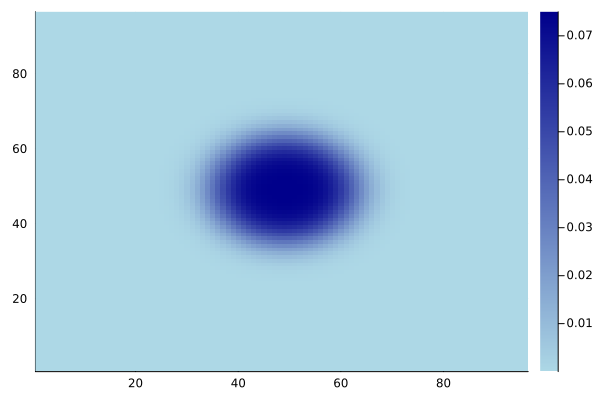

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)